# Chapter 10: Inequalities and limit theorems
 
This Jupyter notebook is the Python equivalent of the R code in section 10.6 R, pp. 447 - 450, [Introduction to Probability, 1st Edition](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578), Blitzstein & Hwang.

----

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Jensen's inequality

Python/NumPy/SciPy make it easy to compare the expectations of $X$ and $g(X)$ for a given choice of $g$, and this allows us to verify some special cases of Jensen's inequality. For example, suppose we simulate 10<sup>4</sup> times from the $Expo(1)$ distribution:

In [2]:
np.random.seed(777)

from scipy.stats import expon

x = expon.rvs(size=10**4)

According to Jensen's inequality, $\mathbb{E}(log \, X) \leq log \, \mathbb{E} \, X$. The former can be approximated by `numpy.mean(numpy.log(x))` and the latter can be approximated by `numpy.log(numpy.mean(x))`, so compute both

In [3]:
meanlog = np.mean(np.log(x))
print('numpy.mean(numpy.log(x)) = {}'.format(meanlog))

logmean = np.log(np.mean(x))
print('numpy.log(numpy.mean(x)) = {}'.format(logmean))

numpy.mean(numpy.log(x)) = -0.5959654797024817
numpy.log(numpy.mean(x)) = -0.015616330406099447


For the $Expo(1)$ distribution, we find that `numpy.mean(numpy.log(x))` is approximately −0.6 (the true value is around −0.577), while `numpy.log(numpy.mean(x))` is approximately 0 (the true value is 0). This indeed suggests $\mathbb{E}(log \, X) \leq log \, \mathbb{E} \, X$. We could also compare `numpy.mean(x**3)` to `numpy.mean(x)**3`, or `numpy.mean(numpy.sqrt(x))` to `numpy.sqrt(numpy.mean(x))` - the possibilities are endless.

## Visualization of the law of large numbers

To plot the running proportion of Heads in a sequence of independent fair coin tosses, we first generate the coin tosses themselves:

In [4]:
np.random.seed(747)

from scipy.stats import binom

nsim = 300
p = 1/2
x = binom.rvs(1, p, size=nsim)

Then we compute $\bar{X}_n$ for each value of $n$ and store the results in `xbar`:

In [5]:
# don't forget, Python is 0-indexed!
xbar = np.cumsum(x) / np.arange(1, nsim+1)

The above line of code performs element-wise division of the two arrays `numpy.cumsum(x)` and `np.arange(1, nsim+1)`. Finally, we plot `xbar` against the number of coin tosses:

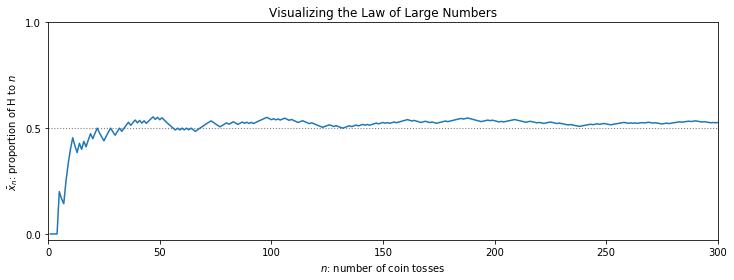

In [6]:
x = np.arange(1, nsim+1)
y = xbar

plt.figure(figsize=(12, 4))

plt.plot(x, y, '-')
plt.hlines(p, 0, nsim, linestyle='dotted', lw=1.1, alpha=0.5)

plt.xlim([0.0, nsim])
plt.xlabel(r'$n$: number of coin tosses')
plt.yticks([0.0, 0.5, 1.0])
plt.ylabel(r'$\bar{x}_{n}$: proportion of H to $n$')
plt.title('Visualizing the Law of Large Numbers')

plt.show()

You should see that the values of `xbar` approach `p`, by the law of large numbers.

## Monte Carlo estimate of $\pi$

A famous example of Monte Carlo integration is the Monte Carlo estimate of $\pi$. The unit disk ${(x, y): x^2 +y^2 ≤ 1}$ is inscribed in the square $[−1, 1] \times [−1, 1]$, which has area 4. If we generate a large number of points that are Uniform on the square, the proportion of points falling inside the disk is approximately equal to the ratio of the disk's area to the square’s area, which is $\pi/4$. Thus, to estimate $\pi$ we can take the proportion of points inside the circle and multiply by 4.

In `matplotlib.pyplot`, to generate Uniform points on the 2D square, we can independently generate the $x$-coordinate and the $y$-coordinate as $Unif(−1, 1)$ r.v.s, using the results of Example 7.1.22:

In [7]:
np.random.seed(707)

from scipy.stats import uniform

nsim = 10**6
a = -1
b = 1

x = uniform.rvs(loc=a, scale=b-a, size=nsim)
y = uniform.rvs(loc=a, scale=b-a, size=nsim)

Let's try graphing a small portion of those $x$- and $y$-coordinates.

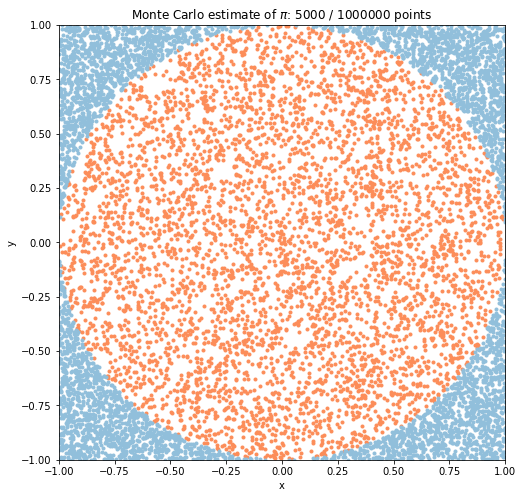

In [8]:
inside = x**2 + y**2 < 1.0
outside = ~inside

_, ax = plt.subplots(figsize=(8,8))

# we'll graph the first n co-ordinate pairs
# for points inside and points outside of 
# x**2 + y**2 = 1.0
n = 5000

ax.plot(x[inside][0:n], y[inside][0:n], '.', color='#fc8d59')
ax.plot(x[outside][0:n], y[outside][0:n], '.', color='#91bfdb')

ax.set_xlim([-1.0, 1.0])
ax.set_xlabel('x')
ax.set_ylim([-1.0, 1.0])
ax.set_ylabel('y')

ax.set_title(r'Monte Carlo estimate of $\pi$: {} / {} points'.format(n, nsim))

plt.show()

To count the number of points _in_ the disk, we use `numpy.sum(x**2 + y**2 < 1.0)`. The array `x**2 + y**2 < 1.0` is effectively an indicator vector whose i<sup>th</sup> element is `True` (equivalent to 1) if the i<sup>th</sup> point falls _inside_ the disk, and `False` (equivalent to 0) otherwise, so the sum of the boolean elements is the number of points in the disk. To get our estimate of $\pi$, we convert the sum into a proportion and multiply by 4. Altogether, we have

In [9]:
num_points_inside = np.sum(x**2 + y**2 < 1.0)
est_pi = 4.0 * num_points_inside / nsim

print('estimated value for pi: {}'.format(est_pi))

estimated value for pi: 3.143868


How close was your estimate to the actual value of $\pi$?

## Visualizations of the central limit theorem

One way to visualize the central limit theorem for a distribution of interest is to plot the distribution of $\bar{X}_{n}$ for various values of $n$, as in Figure 10.5. To do this, we first have to generate i.i.d. $X_{1}, \, \ldots, \, X_{n}$ a bunch of times from our distribution of interest. For example, suppose that our distribution of interest is $Unif(0, 1)$, and we are interested in the distribution of $\bar{X}_{12}$, i.e., we set $n = 12$. In the following code, we create a matrix of i.i.d. standard Uniforms. The matrix has 12 columns, corresponding to $X_{1}$ through $X_{12}$. Each row of the matrix is a different realization of $X_{1}$ through $X_{12}$.

In [10]:
np.random.seed(787)

nsim = 10**4
n = 12

x = uniform.rvs(size=n*nsim).reshape((nsim, n))

print('matrix x has shape: {}'.format(x.shape))

matrix x has shape: (10000, 12)


Now, to obtain realizations of $\bar{X}_{12}$, we simply take the average of each row of the matrix `x`; we can do this by calling the [`numpy.ndarray.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.mean.html) method on `numpy.array` object `x`, specifying `axis=1` to take the average of each row of matrix `x`:

In [11]:
xbar = x.mean(axis=1)

Finally, we create a histogram:

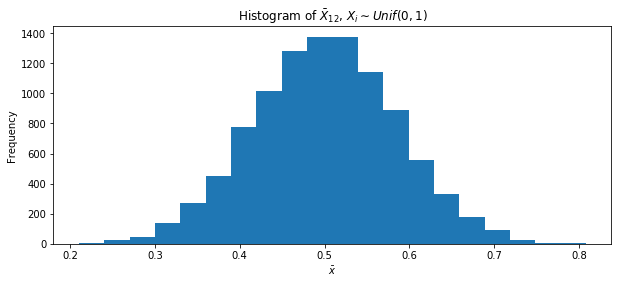

In [12]:
plt.figure(figsize=(10, 4))

plt.hist(xbar, bins=20)

plt.title(r'Histogram of $\bar{X}_{12}$, $X_i \sim Unif(0,1)$')
plt.xlabel(r'$\bar{x}$')
plt.ylabel(r'Frequency')

plt.show()

You should see a histogram that looks Normal. Because the $Unif(0, 1)$ distribution is symmetric, the CLT kicks in quickly and the Normal approximation for $\bar{X}_{n}$ n works quite well, even for $n = 12$. Changing `scipy.stats.uniform` to `scipy.stats.expon`, we see that for $X_j$ generated from the $Expo(1)$ distribution, the distribution of $\bar{X}_{n}$ remains skewed when $n = 12$, so a larger value of $n$ is required before the Normal approximation is adequate.

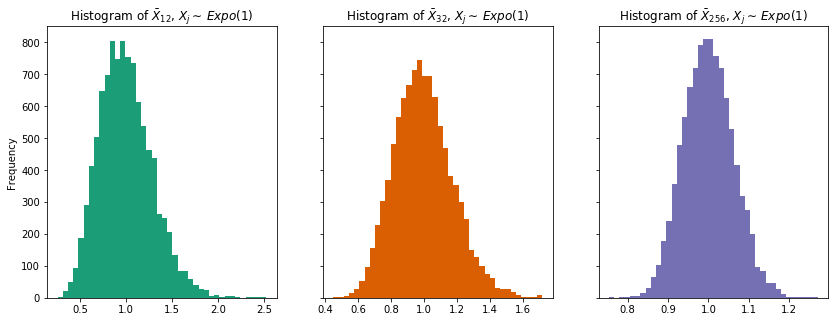

In [13]:
np.random.seed(737)

from scipy.stats import expon

n1, n2, n3 = 12, 32, 256

x1 = expon.rvs(size=n1*nsim).reshape((nsim, n1))
x2 = expon.rvs(size=n2*nsim).reshape((nsim, n2))
x3 = expon.rvs(size=n3*nsim).reshape((nsim, n3))

xbar1 = x1.mean(axis=1)
xbar2 = x2.mean(axis=1)
xbar3 = x3.mean(axis=1)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 5))

ax1.hist(xbar1, bins=40, color='#1b9e77')
ax1.set_ylabel('Frequency')
ax1.set_title(r'Histogram of $\bar{X}_{12}$, $X_j \sim \, Expo(1)$')

ax2.hist(xbar2, bins=40, color='#d95f02')
ax2.set_title(r'Histogram of $\bar{X}_{32}$, $X_j \sim \, Expo(1)$')

ax3.hist(xbar3, bins=40, color='#7570b3')
ax3.set_title(r'Histogram of $\bar{X}_{256}$, $X_j \sim \, Expo(1)$')

plt.show()

## Chi-Square and Student-$t$ distributions
Although the Chi-Square is just a special case of the Gamma (refer to [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html)), it still has its own functions in [`scipy.stats.chi2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html): `chi2.pdf(x, n)` and `chi2.cdf(x, n)` return the values of the $\chi^2_{n}$ PDF and CDF at `x`; and `chi2.rvs(n, size=nsim)` generates `nsim` $\chi^2_{n}$ r.v.s.

The graph below illustrates Theorem 10.4.2:

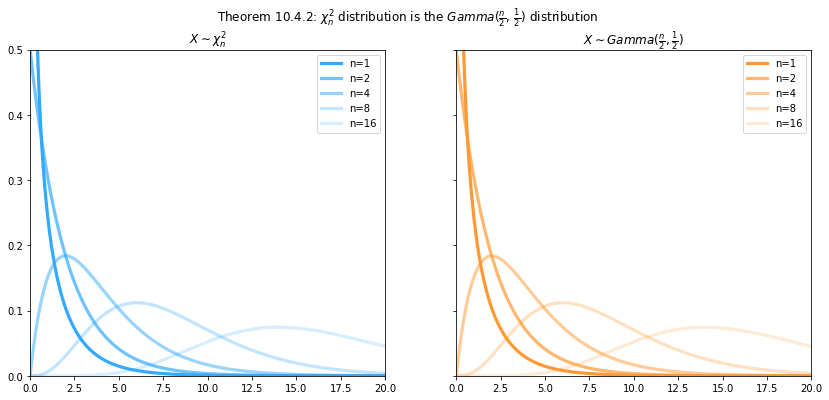

In [14]:
from scipy.stats import chi2, gamma

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 6))

x = np.linspace(0, 20, 1000)

n_vals = [1, 2, 4, 8, 16]
alphas = [1.0, .7, .5, .3, .2]

# graph for Chi-Square
for i,n in enumerate(n_vals):
    ax1.plot(x, chi2.pdf(x, n), lw=3.2, alpha=alphas[i], color='#33aaff', label='n={}'.format(n))
ax1.set_title(r'$X \sim \chi^2_{n}$')
ax1.set_xlim((0, 20.0))
ax1.set_ylim((0.0, 0.5))
ax1.legend()

# graph for Gamma
lambd = 0.5
for i,n in enumerate(n_vals):
    ax2.plot(x, gamma.pdf(x, n/2, scale=1/lambd), lw=3.2, alpha=alphas[i], color='#ff9933', label='n={}'.format(n))
ax2.set_title(r'$X \sim Gamma(\frac{n}{2}, \frac{1}{2})$')
ax2.set_xlim((0, 20.0))
ax2.set_ylim((0.0, 0.5))
ax2.legend()

plt.suptitle(r'Theorem 10.4.2: $\chi^2_{n}$ distribution is the $Gamma(\frac{n}{2}, \, \frac{1}{2})$ distribution')

plt.show()

The Student-$t$ distribution is supported in [`scipy.stats.t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). To evaluate the PDF or CDF of the $t_n$ distribution at $x$, we use `t.pdf(x, n)` or `t.cdf(x, n)`. To generate `nsim` r.v.s from the $t_{n}$ distribution, we use `t.rvs(n, size=nsim)`. Of course, `t.pdf(x, 1)` is the same as [`scipy.stats.cauchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html)'s `cauchy.pdf(x)`.

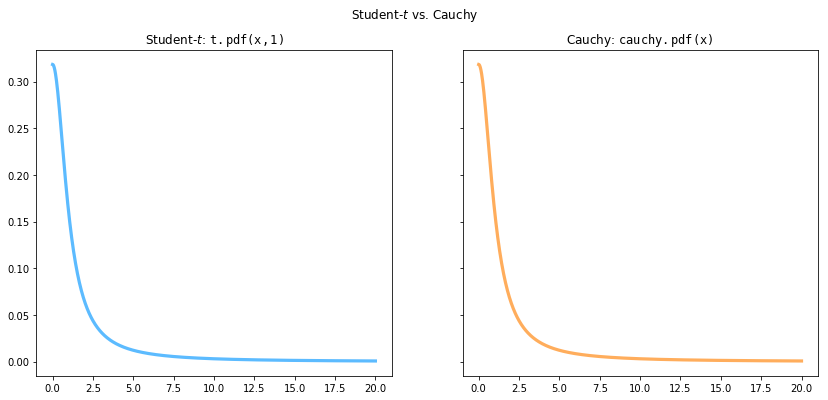

In [15]:
from scipy.stats import t, cauchy

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 6))

x = np.linspace(0, 20, 1000)

# graph for Student-t 
ax1.plot(x, t.pdf(x,1), lw=3.2, alpha=0.8, color='#33aaff')
ax1.set_title(r'Student-$t$: $\tt{t.pdf(x, 1)}$')

# graph for Cauchy
ax2.plot(x, cauchy.pdf(x), lw=3.2, alpha=0.8, color='#ff9933')
ax2.set_title(r'Cauchy: $\tt{cauchy.pdf(x)}$')

plt.suptitle(r'Student-$t$ vs. Cauchy')

plt.show()

----

&copy; Blitzstein, Joseph K.; Hwang, Jessica. Introduction to Probability (Chapman & Hall/CRC Texts in Statistical Science).